# Implementation of linear regression
    * Load the libraries 
    * import the dataset
    * visualize the data to get quick idea
    * split data into traning or testing set
    * fit LR to the traning dataset
    * predict the test result
    * visualize the result
    * calculate the errors

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
# import the dataset
salary_data = pd.DataFrame(pd.read_csv("salary_prediction_data.csv"))
salary_data

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [3]:
salary_data.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [4]:
salary_data.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [5]:
salary_data.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [6]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [7]:
# Iterate over columns and convert object types to category
for column in salary_data.columns:
    if salary_data[column].dtype == 'object':
        salary_data[column] = salary_data[column].astype('category')

# Display DataFrame info
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   1000 non-null   category
 1   Experience  1000 non-null   int64   
 2   Location    1000 non-null   category
 3   Job_Title   1000 non-null   category
 4   Age         1000 non-null   int64   
 5   Gender      1000 non-null   category
 6   Salary      1000 non-null   float64 
dtypes: category(4), float64(1), int64(2)
memory usage: 28.1 KB


In [8]:
auto=salary_data[['Education', 'Experience', 'Location', 'Job_Title','Age','Gender','Salary']]

c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


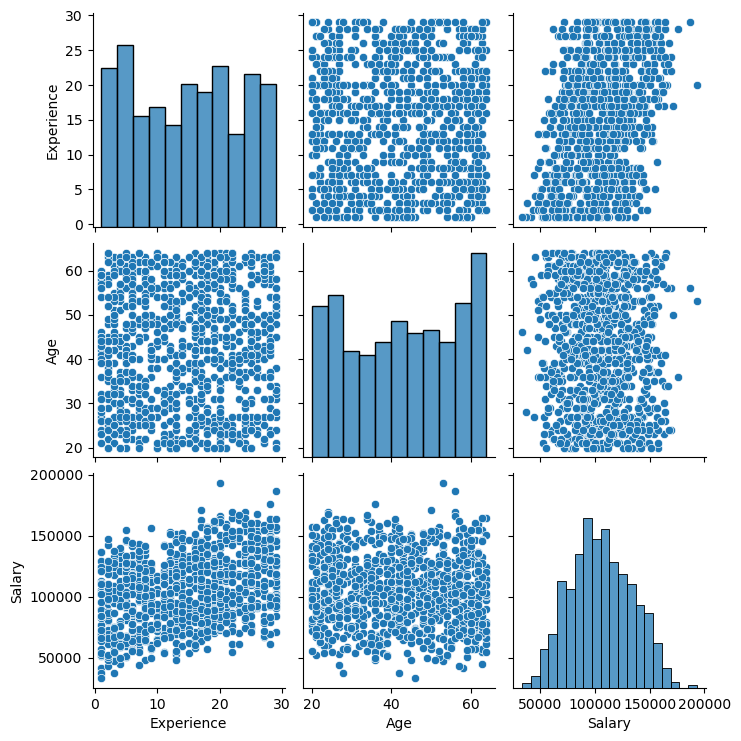

In [9]:
sns.pairplot(auto)

In [10]:
auto1=salary_data[['Experience','Age','Salary']]
auto1.corr()

,Experience,Age,Salary
Experience,1.000000,0.044296,0.341918
Age,0.044296,1.000000,-0.053174
Salary,0.341918,-0.053174,1.000000


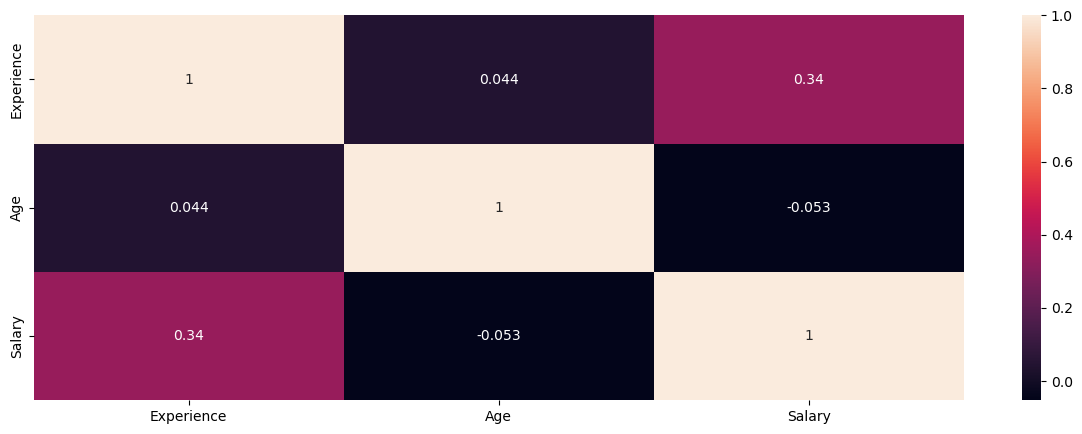

In [11]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto1.corr(),annot=True)
plt.show()

In [12]:
auto

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [13]:
gender = pd.get_dummies(auto['Gender'], drop_first = True)
gender

,Male
0,True
1,True
2,False
3,True
4,False
...,...
995,False
996,False
997,True
998,False


In [14]:
auto = pd.concat([auto, gender], axis = 1)
auto

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Male
0,High School,8,Urban,Manager,63,Male,84620.053665,True
1,PhD,11,Suburban,Director,59,Male,142591.255894,True
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,False
3,High School,29,Rural,Director,45,Male,96834.671282,True
4,PhD,25,Urban,Analyst,26,Female,132157.786175,False
...,...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864,False
996,High School,24,Urban,Engineer,30,Female,74468.205020,False
997,Master,18,Rural,Analyst,44,Male,98207.026024,True
998,Bachelor,27,Suburban,Director,31,Female,108544.922720,False


In [15]:
education = pd.get_dummies(auto['Education'], drop_first = False)
education

,Bachelor,High School,Master,PhD
0,False,True,False,False
1,False,False,False,True
2,True,False,False,False
3,False,True,False,False
4,False,False,False,True
...,...,...,...,...
995,False,True,False,False
996,False,True,False,False
997,False,False,True,False
998,True,False,False,False


In [16]:
auto = pd.concat([auto, education], axis = 1)
auto

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Male,Bachelor,High School,Master,PhD
0,High School,8,Urban,Manager,63,Male,84620.053665,True,False,True,False,False
1,PhD,11,Suburban,Director,59,Male,142591.255894,True,False,False,False,True
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,False,True,False,False,False
3,High School,29,Rural,Director,45,Male,96834.671282,True,False,True,False,False
4,PhD,25,Urban,Analyst,26,Female,132157.786175,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864,False,False,True,False,False
996,High School,24,Urban,Engineer,30,Female,74468.205020,False,False,True,False,False
997,Master,18,Rural,Analyst,44,Male,98207.026024,True,False,False,True,False
998,Bachelor,27,Suburban,Director,31,Female,108544.922720,False,True,False,False,False


In [17]:
auto = auto.drop(['Gender','Education','Location','Job_Title'],axis = 1)
auto

,Experience,Age,Salary,Male,Bachelor,High School,Master,PhD
0,8,63,84620.053665,True,False,True,False,False
1,11,59,142591.255894,True,False,False,False,True
2,28,61,97800.255404,False,True,False,False,False
3,29,45,96834.671282,True,False,True,False,False
4,25,26,132157.786175,False,False,False,False,True
...,...,...,...,...,...,...,...,...
995,8,25,64683.389864,False,False,True,False,False
996,24,30,74468.205020,False,False,True,False,False
997,18,44,98207.026024,True,False,False,True,False
998,27,31,108544.922720,False,True,False,False,False


In [18]:
auto.corr()

,Experience,Age,Salary,Male,Bachelor,High School,Master,PhD
Experience,1.000000,0.044296,0.341918,-0.020602,0.005777,-0.016403,-0.018457,0.028903
Age,0.044296,1.000000,-0.053174,0.049055,-0.016299,0.075877,-0.013039,-0.047072
Salary,0.341918,-0.053174,1.000000,0.028173,-0.225564,-0.594713,0.197899,0.628782
Male,-0.020602,0.049055,0.028173,1.000000,0.002081,-0.039391,0.035764,0.002234
Bachelor,0.005777,-0.016299,-0.225564,0.002081,1.000000,-0.340480,-0.327935,-0.336896
High School,-0.016403,0.075877,-0.594713,-0.039391,-0.340480,1.000000,-0.329670,-0.338679
Master,-0.018457,-0.013039,0.197899,0.035764,-0.327935,-0.329670,1.000000,-0.326200
PhD,0.028903,-0.047072,0.628782,0.002234,-0.336896,-0.338679,-0.326200,1.000000


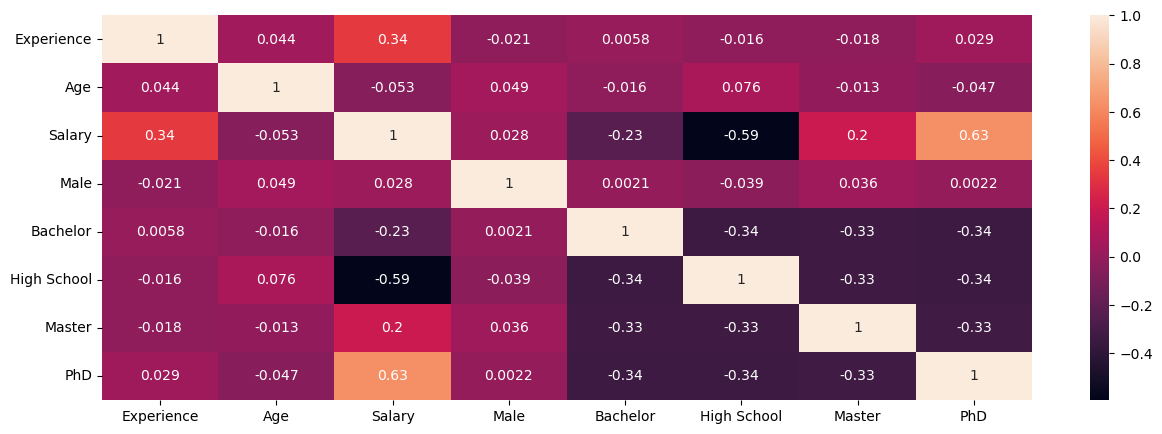

In [19]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show() 

In [20]:
auto = auto.drop(['Male'],axis = 1)
auto

,Experience,Age,Salary,Bachelor,High School,Master,PhD
0,8,63,84620.053665,False,True,False,False
1,11,59,142591.255894,False,False,False,True
2,28,61,97800.255404,True,False,False,False
3,29,45,96834.671282,False,True,False,False
4,25,26,132157.786175,False,False,False,True
...,...,...,...,...,...,...,...
995,8,25,64683.389864,False,True,False,False
996,24,30,74468.205020,False,True,False,False
997,18,44,98207.026024,False,False,True,False
998,27,31,108544.922720,True,False,False,False


In [21]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experience   1000 non-null   int64  
 1   Age          1000 non-null   int64  
 2   Salary       1000 non-null   float64
 3   Bachelor     1000 non-null   bool   
 4   High School  1000 non-null   bool   
 5   Master       1000 non-null   bool   
 6   PhD          1000 non-null   bool   
dtypes: bool(4), float64(1), int64(2)
memory usage: 27.5 KB


In [22]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
salary_data_train, salary_data_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [23]:
salary_data_test.shape

(150, 7)

In [24]:
salary_data_train.shape

(850, 7)

In [25]:
from sklearn.linear_model import LinearRegression
X_train = salary_data_train[['Experience','Age',"Bachelor","High School",
                    "Master","PhD"]]

y_train = salary_data_train['Salary'].astype('int')
# df_test_predict = X_train.iloc[0:1]
# for linear regression
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

# # #for logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)

# # #for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# model.predict(df_test_predict)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearRegression()

In [26]:
# #Creating pickle file
import pickle
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [27]:
#training acc
print("Linear regression = ",lr_model.score(X_train, y_train)*100)
print("Logistic regression = ",lg_model.score(X_train, y_train)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train)*100)

Linear regression =  73.50880645569191
Logistic regression =  12.941176470588237
Polynomial regression =  77.75687147884152


In [28]:
X_test = salary_data_test
y_test = auto['Salary'].astype('int')
X_test = auto.drop(['Salary'],axis = 1)

In [29]:
X_test

,Experience,Age,Bachelor,High School,Master,PhD
0,8,63,False,True,False,False
1,11,59,False,False,False,True
2,28,61,True,False,False,False
3,29,45,False,True,False,False
4,25,26,False,False,False,True
...,...,...,...,...,...,...
995,8,25,False,True,False,False
996,24,30,False,True,False,False
997,18,44,False,False,True,False
998,27,31,True,False,False,False


In [30]:
y_test

0       84620
1      142591
2       97800
3       96834
4      132157
        ...  
995     64683
996     74468
997     98207
998    108544
999     71077
Name: Salary, Length: 1000, dtype: int32

In [31]:
#test acc
print("Linear regression = ",lr_model.score(X_test, y_test)*100)
print("Logistic regression = ",lg_model.score(X_test, y_test)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_test), y_test)*100)



Linear regression =  73.2926115153061
Logistic regression =  11.0
Polynomial regression =  76.1161716533647


In [32]:
data = salary_data_test.iloc[21:22].astype('int')
data

,Experience,Age,Salary,Bachelor,High School,Master,PhD
472,14,34,109825,1,0,0,0


In [33]:
actual_salary = data['Salary']
data = data.drop(['Salary'],axis = 1)
data

,Experience,Age,Bachelor,High School,Master,PhD
472,14,34,1,0,0,0


In [34]:
print("Predicted Salary using linear regression",lr_model.predict(data))
print("Predicted Salary using logistic regression",lg_model.predict(data))
print("Predicted Salary using Polynomial regression",pol_reg.predict(poly_reg.fit_transform(data)))

print("Actual Salary",actual_salary)

Predicted Salary using linear regression [94331.76562732]
Predicted Salary using logistic regression [81543]
Predicted Salary using Polynomial regression [94473.71780057]
Actual Salary 472    109825
Name: Salary, dtype: int32


In [35]:
actual_salary

472    109825
Name: Salary, dtype: int32

In [54]:
data = {'Experience':[float(input("Enter Exp = ")) for i in range(1)],
        'Age':[int(input("Enter age = ")) for i in range(1)],
        "Bachelor":[int(input("Bachelors's degree ? Enter 1 or 0 = ")) for i in range(1)],
        "High School":[int(input("High School ? Enter 1 or 0 = ")) for i in range(1)],
        "Master":[int(input("Master's degree ? Enter 1 or 0 = ")) for i in range(1)],
         "PhD":[int(input("Phd degree ? Enter 1 or 0 = ")) for i in range(1)]}

df = pd.DataFrame(data)

df

,Experience,Age,Bachelor,High School,Master,PhD
0,27.0,31,1,0,0,0


In [58]:
#predicted_salary = lr_model.predict(poly_reg.fit_transform(df))
predicted_salary = lr_model.predict(df)

print("predicted Salary",predicted_salary)

predicted Salary [108741.09188842]


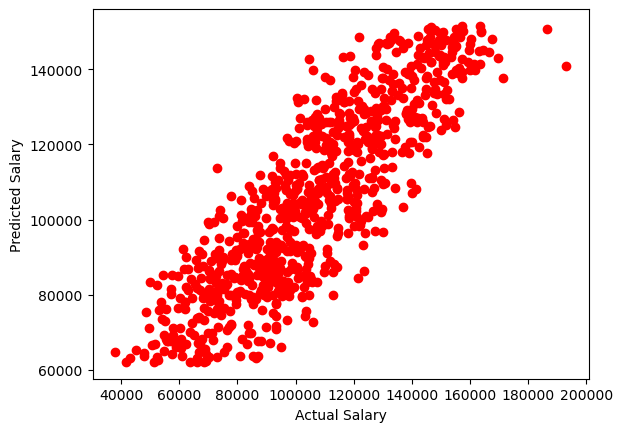

In [59]:
plt.scatter(y_train,lr_model.predict(X_train),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

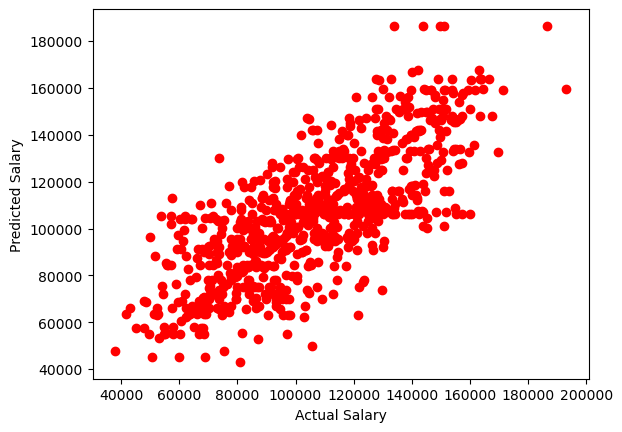

In [60]:
plt.scatter(y_train,lg_model.predict(X_train),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [61]:
import pickle as pk
#to save model
filename = 'model.pickle'
pk.dump(lr_model, open(filename, 'wb'))

In [64]:
import pickle as pk
import pandas as pd
#to save model
filename = 'model.pickle'
#load the model
loaded_model = pk.load(open(filename, 'rb'))
# print("Polynomial regression = ",loaded_model.score(poly_reg.fit_transform(X_train), y_train)*100)

data = {'Experience':[float(input("Enter Exp = ")) for i in range(1)],
        'Age':[int(input("Enter age = ")) for i in range(1)],
        "Bachelor":[int(input("Bachelors's degree ? Enter 1 or 0 = ")) for i in range(1)],
        "High School":[int(input("High School ? Enter 1 or 0 = ")) for i in range(1)],
        "Master":[int(input("Master's degree ? Enter 1 or 0 = ")) for i in range(1)],
         "PhD":[int(input("Phd degree ? Enter 1 or 0 = ")) for i in range(1)]}


df = pd.DataFrame(data)
predicted_salary = loaded_model.predict(df)
print("predicted Salary",predicted_salary)
df

predicted Salary [88939.03203945]


,Experience,Age,Bachelor,High School,Master,PhD
0,25.0,41,0,1,0,0
